# 1주차: 빈도수의 가시화
- 전산언어학
- tool 없이 프로그래밍 만드는 것도 배움 !
- 이건 중요함
- 여기 수업은 라이브러리 불러와서 tool 쓰는 것을 배울 것
- 영어 언어 / 언어 처리의 기본
> tool
- word tokenizer
- Sentence tokenizer
- POS tagger
- Stemmer
- Lemmatizer (사전)
- Concordancer
- Parser

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> q

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAt

True

In [ ]:
import nltk
nltk.download('brown', 'inaugural')
brown = nltk.corpus.brown

[nltk_data] Downloading package brown to inaugural...
[nltk_data]   Unzipping corpora/brown.zip.


In [ ]:
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

## ConditionalFreqDist(), tabulate(), plot()
- 빈도수를 가시화하는 함수
- conditionalfreqdist 함수에 파라미터는 `[(,),(,),(,)]`로
카테고리
- 행종류, 열특성
- text 종류, 열은

In [ ]:
from nltk.inference.tableau import Categories

cfd = nltk.ConditionalFreqDist(
    (genre, word)
    for genre in brown.categories()
    for word in brown.words(categories=genre)
)

modals = 'can could would will might may'.split()
cfd.tabulate(conditions=brown.categories(), samples=modals)

                  can could would  will might   may 
      adventure    46   151   191    50    58     5 
 belles_lettres   246   213   392   236   113   207 
      editorial   121    56   180   233    39    74 
        fiction    37   166   287    52    44     8 
     government   117    38   120   244    13   153 
        hobbies   268    58    78   264    22   131 
          humor    16    30    56    13     8     8 
        learned   365   159   319   340   128   324 
           lore   170   141   186   175    49   165 
        mystery    42   141   186    20    57    13 
           news    93    86   244   389    38    66 
       religion    82    59    68    71    12    78 
        reviews    45    40    47    58    26    45 
        romance    74   193   244    43    51    11 
science_fiction    16    49    79    16    12     4 


꼭 바이그램 모형을 위해서만 쓰이지는 않는구나\
조건을 이렇게 추가할 수 있구나 list comprehensoin

In [ ]:
cfd1 = nltk.ConditionalFreqDist(
    (genre, modal)
    for genre in brown.categories()
    for modal in 'can could would will might may'.split()

    for word in brown.words(categories=genre)
    if word.lower() == modal
)

cfd1.tabulate()

                  can could   may might  will would 
      adventure    48   154     7    59    51   194 
 belles_lettres   249   216   221   113   246   397 
      editorial   124    57    79    39   235   185 
        fiction    39   168    10    44    56   291 
     government   119    38   179    13   244   120 
        hobbies   276    59   143    22   269    83 
          humor    17    33     8     8    13    56 
        learned   367   159   336   128   340   321 
           lore   170   142   170    50   178   188 
        mystery    45   145    15    57    25   189 
           news    94    87    93    38   389   246 
       religion    84    59    79    12    72    69 
        reviews    45    40    47    26    61    48 
        romance    79   195    11    51    49   247 
science_fiction    16    49     4    12    17    80 


In [ ]:
# Let's do exercise first
celebrity = [ ('Madonna','Singer'),('Brad Pitt','Actor'), ('Rain','Singer'), \
             ('Gisele Bundchen','Model'), ('Rain','Actor'), ('Yun ju, Jang','Model'),('Yun ju, Jang', 'Actor') ]

In [ ]:
cf = nltk.ConditionalFreqDist(celebrity)

In [ ]:
cf
# 5 conditions => 5개의 조건:

<ConditionalFreqDist with 5 conditions>

## conditional의 의미와 확률론적 언어모형
- 여기서 왜 (,)형태의 list가 쓰일까
- conditional 의 의미는 뭐지? 왜 5개의 조건, 5 condition이라고 할까

- 확률론적 언어모형
  - m개의 단어가 주어졌을때, (m개의 열이 생성되고) 문장으로써 성립될 확률 P(word1, word2, word3, ..., wordm)을 출력함으로써 이 단어열이 실제로 현실에서 사용될 수 있는 문장인지를 판별하는 모형이다
  - 이 확률은 각 단어의 확률과 단어들의 조건부 확률이 이용되는데, 지금까지 이전의 단어 열이 나왔을때, 그다음 단어로 (열로) wordm 이 나올 조건부 확률과 그 단어의 확률을 곱한 값을 말한다.
  - 지금까지(이전까지) 나온 단어를 문맥 (context)라고 한다.
  - 이건 word2vec에도 나오는 개념이니 복습을 잘 해두도록 하자
- 유니그램 모형\
: 만약 모든 단어의 활용이 완전히 서로 독립이라면, 단어열의 확률은 각 단어의 확률의 곱이 된다.
- 바이그램 모형(Markox Model)\
: 만약 단어의 활용이 바로 전 단어에만 의존할때, 단어 열의 확률
- N그램 모형\
: 만약 단어의 활용이 바로 전 n-1개의 단어에만 의존할때, 단어열의 확률

In [ ]:
from nltk import bigrams, word_tokenize # 바이그램 생성 ! (바로 전 단어에만 의존 !)

In [ ]:
from nltk.util import ngrams # n-그램 생성 !

sentence = 'I am a boy.'
tokens= word_tokenize(sentence)

bigram = bigrams(tokens)
trigram = ngrams(tokens, 3) # n=3 (전에 나온 3개의 단어만 참조)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
print("bigram:")
for word in bigram:
    print(word)

print("\ntrigram:")
for word in trigram:
    print(word)

# 토큰이 만들어진걸 볼 수 있지 => I am / am a / a boy 두개씩 나누어진 걸 bigram

bigram:
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')

trigram:
('I', 'am', 'a')
('am', 'a', 'boy')
('a', 'boy', '.')


In [ ]:
# 토큰열을 =  문장의 다른말로 쓰여
bigram = ngrams(tokens, 2, pad_left=True, pad_right=True) # sentence start and end => padding / left_pad_symbol='SS', right_pad_symbl='SE'

In [ ]:
for word in bigram:
  print(word)

(None, 'I')
('I', 'am')
('am', 'a')
('a', 'boy')
('boy', '.')
('.', None)


`조건부 확률 추정` 방법을 이용해보자

In [ ]:
from nltk import ConditionalFreqDist

sentence = 'I am a boy.'
tokens = word_tokenize(sentence)
bigram = ngrams(tokens, 2, pad_left =True, pad_right=True,left_pad_symbol="SS", right_pad_symbol="SE")
cfd = ConditionalFreqDist([(word[0], word[1]) for word in bigram])
# conditional freq dist의 tuple안에 들어가는 원소가 무엇인지 알게 되었지??

In [ ]:
cfd.conditions()

['SS', 'I', 'am', 'a', 'boy', '.']

In [ ]:
cfd["SS"]

FreqDist({'I': 1})

즉, ConditionalFreqDist 클래스는 객체를 생성해주는데, \
문맥을 조건으로 가지는 사전 자료형과 비슷하다.

In [ ]:
# 다운받고 코퍼스에서 가져오고 바이그램 확률 추정해봐
import nltk
nltk.download('moive_reviews')
nltk.download('punkt')
from nltk.corpus import moive_reviews

# [[word for word in bigram] for tokens in moive_reviews.sent() for ]
sentences = [ [word for word in bigram]
    for tokens in moive_reviews.sent()
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol='SS', right_pad_symbol='SE')
]

SyntaxError: ignored

In [ ]:
import nltk
nltk.download('moive_reviews')
nltk.download('punkt')

[nltk_data] Error loading moive_reviews: Package 'moive_reviews' not
[nltk_data]     found in index
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
! pip install nltk.corpus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement nltk.corpus (from versions: none)
ERROR: No matching distribution found for nltk.corpus


In [ ]:
! pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
sentences = []
for tokens in movie_reviews.sents(): # 문장하나당
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE") # 문장 하나에서 tokens가 있을 거아니야
    # words중 2개 택했으니 bigram이 되고,
    sentences += [t for t in bigram] # word for word in bigram 은 tuple = word 하나의 단위가 되겠지

sentences[:20]

# [ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE") for token in movie_reviews.sents()]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE'),
 ('SS', 'they'),
 ('they', 'get'),
 ('get', 'into')]

In [ ]:
nltk.download('corpus')

[nltk_data] Error loading corpus: Package 'corpus' not found in index


False

In [ ]:
from nltk.book import *
nltk.download('book', quiet=True)

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


True

In [ ]:
import nltk
from nltk.corpus import movie_reviews

In [ ]:
sentences = [ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE") for tokens in movie_reviews.sents()]
sentences[:20]

In [ ]:
sentences = [ch for tokens in movie_reviews.sents() for ch in ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")]
sentences[:20]

[('SS', 'plot'),
 ('plot', ':'),
 (':', 'two'),
 ('two', 'teen'),
 ('teen', 'couples'),
 ('couples', 'go'),
 ('go', 'to'),
 ('to', 'a'),
 ('a', 'church'),
 ('church', 'party'),
 ('party', ','),
 (',', 'drink'),
 ('drink', 'and'),
 ('and', 'then'),
 ('then', 'drive'),
 ('drive', '.'),
 ('.', 'SE'),
 ('SS', 'they'),
 ('they', 'get'),
 ('get', 'into')]

In [ ]:
movie_reviews.sents()

[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ...]

In [ ]:
# [word for word in word_list if word]
# list-comprehension이 돌아왔어

In [ ]:
cfd = ConditionalFreqDist(sentences)
# 우리는 cfd라는 객체를 생성해줄건데, 얘는 dictionary야 근데 문맥을 조건으로 가져
# 즉, {'condition':'그 전 단어들 그 두개씩 묶인 tuple!'}
# 그래서, cfd['SS']를 검색하면 'SS'가 condition 에 해당하는 친구와 그 친구의 빈도수를 알려줘
# cfd.conditions()는 tuple에 들어갈 수 있는 친구들이라 SE가 없어

`conditionalfreqdist`: \
문맥을 조건으로 가지는 사전 자료형
-

In [ ]:
from nltk.util import ngrams
from nltk import ConditionalFreqDist
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')
from nltk.corpus import movie_reviews

sentences = []
for tokens in movie_reviews.sents():
    bigram = ngrams(tokens, 2, pad_left=True, pad_right=True, left_pad_symbol="SS", right_pad_symbol="SE")
    sentences += [t for t in bigram]

cfd = ConditionalFreqDist(sentences)

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
cfd["SS"].most_common(5)
# 문장의 시작에는 the, it, I 와 같은 determiner나 대명사(주어)가 많구나

[('the', 7965), ('it', 3038), ('i', 2350), ('but', 1754), ('he', 1642)]

In [ ]:
cfd["i"].most_common(5)
# i 라는 문자(ch)가 아닌 word 뒤에는 (token 단위이니까) modals(조동사)와 be, do 와 같은 AUX verb가 많구나
# apherstrope도 있네 아마 축약형으로 많이 쓰이기 때문이겠지

[("'", 1357), ('was', 506), ('can', 351), ('have', 330), ('don', 276)]

In [ ]:
cfd["."].most_common(5)
# dot는 문장 끝의 역할이 젤 많고, 기호들도 많네 puctuation들

[('SE', 57626), ('.', 1893), ('"', 1854), (')', 535), ('s', 129)]

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 47928 (\N{HANGUL SYLLABLE MUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51109 (\N{HANGUL SYLLABLE JANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 52395 (\N{HANGUL SYLLABLE CEOS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:128: UserWarning: Glyph 45800 (\N{HANGUL SYLLABLE DAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyth

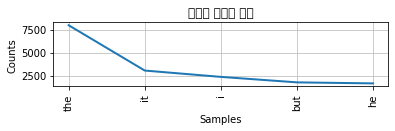

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(311)
cfd["SS"].plot(5, title='문장의 첫단어 분포')
plt.show()
# 글자 깨지는 오류 외워두기

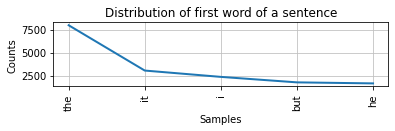

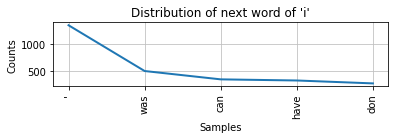

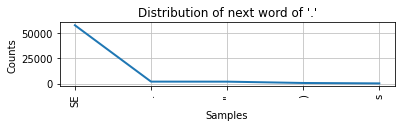

<AxesSubplot:title={'center':"Distribution of next word of '.'"}, xlabel='Samples', ylabel='Counts'>

In [ ]:
plt.subplot(311)
cfd["SS"].plot(5, title="Distribution of first word of a sentence")
plt.subplot(312)
cfd["i"].plot(5, title="Distribution of next word of 'i'")
plt.subplot(313)
cfd["."].plot(5, title="Distribution of next word of '.'")

중요한것 조건부 확률이라는 것에 근거한 쓰임새라는 것 (이 함수, 클래스를 배울때):\
MLEProbDist 랑 라이브러리 인포트 하는 식 잘 외워두기

In [ ]:
from nltk.probability import ConditionalProbDist, MLEProbDist
cpd = ConditionalProbDist(cfd, MLEProbDist) # 두개의 인자전달
# training

In [ ]:
cpd['i'].prob('am')
# i 다음에 올 단어가 am 일 확률
# 특정 word가 바이그램일 확률 / i가 conditon으로 들어간 모든 확률(i가 condition으로 들어가 있는 모든 tuple의 갯수)

0.018562267971650354

In [ ]:
cpd['i'].prob('is')

0.0002249971875351558

In [ ]:
cpd['we'].prob('are')

0.08504504504504505

In [ ]:
cpd['we'].prob('is')
# 이게 문법적으로 틀렸다는 것을 확률적으로 인지가 가능하다.

0.0

정확해.. 그래서 이 모델은 문장 생성 모델을 만들어줄 수 있어
## 바이그램 언어모형
- 조건부 확률을 알게 되면, 각 문장의 확률을 구할 수 있어
- 토큰열(토큰 분해된 문장 단위)을 n-그램 형태로 분해해
- **`전체 문장의 확률은 조건부 확률의 곱으로 나타낼 수 있어`*
- 너무 중요함: 전체 문장의 확률 식을 처음에 봤었잖아
- 이게 방금 전까지 배운 조건부 확률 모델로 전체 문장의 확률로 확장해 볼 수 있는거야
- 단위를 잘 생각해야 해: 문장별로 나오는걸 볼 수 있고 word 별로 볼 수 있고 그래서 내가 아까 생각난 것은 i was와 같은건 word vector 생성이 이외에 의미를 부여하기에는 문서별로 다르지 않기 때문에 의미 부여는 어려울 수 있겠다 싶어

In [ ]:
import numpy as np
def sentence_score(s):
  p = 0.0
  for i in range(len(s) - 1):
    c = s[i]
    w = s[i+1]
    p += np.log(cpd[c].prob(w) + np.finfo(float).eps)
  return np.exp(p)

In [ ]:
# numpy.finfo
# => 가장 작은 양수 (엡실론)의 역할로, 로그함수를 취했을때 0의 값이 되지 않도록 도와주는 친구임
# 그럼 여기서 로그는 왜 취하는거지?

In [ ]:
test_sentence = 'I like the movie .'.split()
sentence_score(test_sentence)
# 문장 리스트를 넣었을때, 이게 얼마나 말이 되는지의 확률
# 전체 문장확률 = 문장이 딱 그렇게 구성될 확률

8.586659562486254e-20

In [ ]:
test = 'I like the . movie'.split()
sentence_score(test)
# 위에 비해서 엄청 낮을 걸 볼수 있지
# 문법 검사기도 비슷한 로직으로 만들것 같아

1.7474376016692618e-26

In [ ]:
# one more testing
te2 = 'like . I me movie'.split()
sentence_score(te2)

1.1273996791231601e-49

전체 문장의 확률의 의미를 모르겠음> 질문 : 해결!

### 문장 생성모델 (generative model)
- 위 바이그램 모델을 바탕으로, 임의의 랜덤한 문장을 생성할 수 있어

In [ ]:
# cpd 모델 좀 더 공부 ..! (메서드 뭐 있는지)
def generate_sentence(seed=None):
  if seed is not None:
    import random
    random.seed(seed)
  c = "SS"
  sentence = []
  while True:
    if c not in cpd:
      break
    w = cpd[c].generate()

    if w == 'SE':
      break
    elif w in ['', '', '']:
      w2 =w.upper()

1-45 랜점하게 난수를 발생시킬 경우에
seed => 프로그램
일정한 규칙대로 나오는 경우가 있어 (프로그램 오류) => 일정한 패턴으로 13579
- 1234: 계속 초기화가 되면서 좀더 랜덤 한 수를 뽑아낼때, 규칙적으로 나오는걸 배재할 수 있음
- 1234의 뜻은?
- 재현성 확보를 위해

In [ ]:
import nltk
nltk.download() ==quiet

In [ ]:
nltk.download('book', quiet=True)

True

In [ ]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
from nltk.corpus import gutenberg

gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
# nltk.corpus.gutenberg
# nltk.corpus.gutenberg.raw('shakespeare-hamlet')
raw_text = gutenberg.raw('shakespeare-hamlet.txt')

In [ ]:
print(raw_text[:100]) #string

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo a


In [ ]:
from nltk.tokenize import word_tokenized
from nltk.tokenize import sent_tokenized
# referent 가 동일 -> 다른 단어들
# word embedding not word freq_count_vectorizer

word_tokenized(raw_text)

ImportError: ignored